In [4]:
import joblib

#Loading Models from their respective notebooks
logreg = joblib.load('logistic_regression_model.pkl')
rf = joblib.load('random_forest_model.pkl')

#Loading Test Data
X_test,y_test = joblib.load('test_data.pkl')


In [9]:
#Computing Predictions

y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

proba_logreg = logreg.predict_proba(X_test)[:, 1]
proba_rf = rf.predict_proba(X_test)[:, 1]

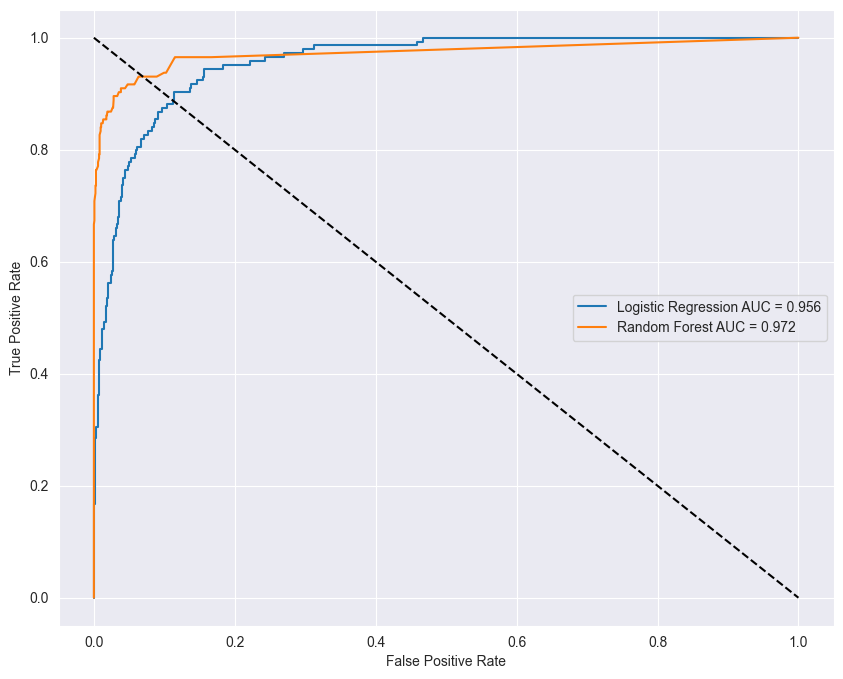

In [13]:
#ROC Curve Comparison

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

false_pos_rate_lr, true_pos_rate_lr,_ = roc_curve(y_test, proba_logreg)
false_pos_rate_rf, true_pos_rate_rf,_ = roc_curve(y_test, proba_rf)

auc_lr = roc_auc_score(y_test, proba_logreg)
auc_rf = roc_auc_score(y_test, proba_rf)

plt.figure(figsize=(10,8))

plt.plot(false_pos_rate_lr,true_pos_rate_lr,label=f'Logistic Regression AUC = {auc_lr:.3f}')
plt.plot(false_pos_rate_rf,true_pos_rate_rf,label=f'Random Forest AUC = {auc_rf:.3f}')

plt.plot([0,1],[1,0],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\roc_curve_model_comparison.png")
plt.show();

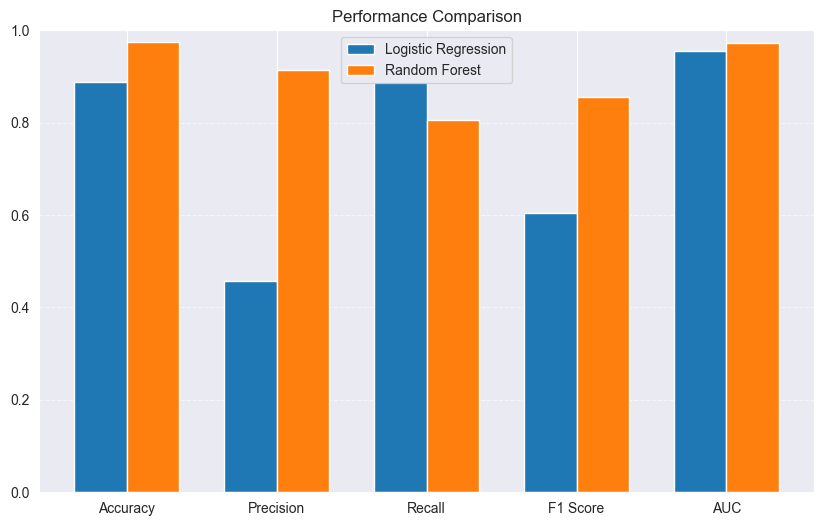

In [16]:
#Bar Chart Comparison
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

metrics_lr = [
    accuracy_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_logreg),
    auc_lr
]

metrics_rf = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf),
    auc_rf
]

labels = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i-width/2 for i in x], metrics_lr, width, label="Logistic Regression")
plt.bar([i+width/2 for i in x], metrics_rf, width, label="Random Forest")

plt.xticks(x, labels)
plt.title("Performance Comparison")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\metrics_model_comparison.png")
plt.show()


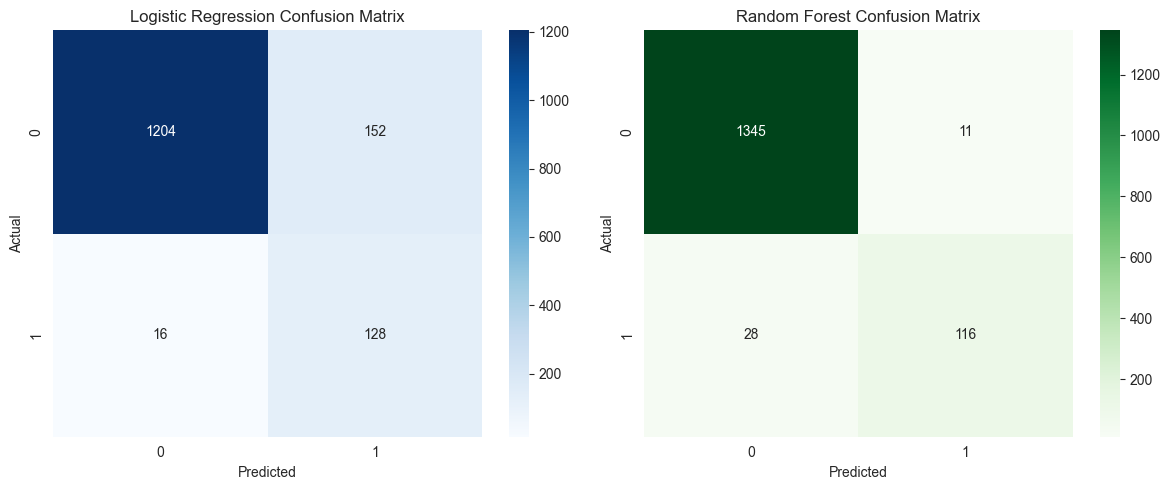

In [17]:
#Side-by-Side Confusion Matrices

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_lr = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\confusion_matrix_model_comparison.png")
plt.show()
